# Image Classification
In this exercise, you will be classifying images about clothes. The data set you will be using is called `fashion-small.csv`.

### Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.


In [30]:
# Import your libraries
# For data management
import pandas as pd
import numpy as np

# Import classifiers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# metrics contain our plot_confustion_matrix and classification_report
from sklearn import metrics

# Helper fuction to splitting data
from sklearn.model_selection import train_test_split

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline 


# 1. Inspect and explore our data
1. Load the `fashion-small.csv` data into a pandas dataframe. 
2. Inspect / remove null values. 
3. Inspect / remove duplicate rows. 
4. Print out the number examples in each class aka the class balances. 
5. Visualize at least one image.

In [2]:
# 1. Load data into a pandas dataframe. 
df = pd.read_csv('data/digits-small.csv')
print(df.shape)

(4200, 785)
0
0
(4200, 785)
0
(4200, 785)


### Inspect for null values

In [3]:
# 2. Inspect / remove null values. 
print(df.shape)
print(df.isna().sum().sum())
df = df.dropna()
print(df.shape)
print(df.isna().sum().sum())

(4200, 785)
0
(4200, 785)
0


### Check for duplicates

In [4]:
# 3. Inspect / remove duplicate rows. 
print(df.shape)
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())
print(df.shape)

(4200, 785)
0
0
(4200, 785)


### Lets look at our class balances

In [5]:
# 4. Print out the number examples in each class aka the class balances. 
df.label.value_counts(), df.label.value_counts(normalize=True)

(1    440
 0    439
 7    437
 9    433
 2    425
 3    415
 6    410
 5    408
 4    398
 8    395
 Name: label, dtype: int64,
 1    0.104762
 0    0.104524
 7    0.104048
 9    0.103095
 2    0.101190
 3    0.098810
 6    0.097619
 5    0.097143
 4    0.094762
 8    0.094048
 Name: label, dtype: float64)

# Visualize one image

## First, we need to create a list that is just our pixel columns

In [6]:
# Grabs all of the columns 
cols = df.columns

# Convert the all columns object into a regular list
cols = list(cols.values)

# Sanity check that it is now just a list.
print(type(cols))

# Remove just the label column from the list
cols.remove('label')


<class 'list'>


## Extract one row and reshape it to its original 28x28 shape and plot the reshaped image.

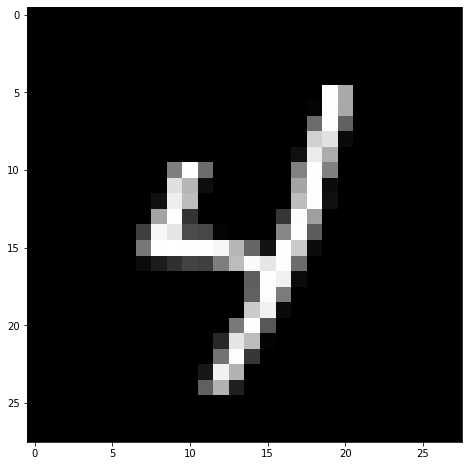

In [8]:
# Select just the pixel columns and convert them to a numpy array by using .values. 
imgs = df[cols].values

# Select just one image from all the images
img = imgs[123]

# Reshape the image to be a 28x28 matrix (original format of image)
img = img.reshape(28,28)

# Plot reshaped image
plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')

___
# 2. Select and engineer our features.
1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 
2. Define our `X` and `y` data. 
2. Train-test-split our `X` and `y` data

### 1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 

In [9]:
# DOING THIS AGAIN JUST FOR PRACTICE 

# Grabs all of the columns 
selected_features = df.columns


# Convert the all columns object into a regular list
selected_features = list(selected_features)

# Sanity check that it is now just a list.
print(type(selected_features))

# Remove the label column from the list
# This happnes 'in place'
selected_features.remove('label')

<class 'list'>


### 2. Define our `X` and `y`

In [10]:
# 2. Define our `X` and `y` data. 

X = df[selected_features]

y = df.label

### 3. Train-test-split our `X` and `y` data

In [11]:
# 3. Train-test-split our `X` and `y` data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

____
# 3. Build and train our model
1. Initalize an empty Support Vector Classifier model.
2. Fit that model with our training data. 

In [12]:
# 1. Initalize an empty Support Vector Classifier model.
from sklearn import svm

# Initalize our Support Vector Classifier
model = svm.SVC()

In [13]:
# 2. Fit that model with our training data. 
model.fit(X_train, y_train)

SVC()

___
# 4. Evaluate our model
1. Get a baseline accuracy score.
2. Make new predictions using our test data. 
3. Print the classification report. 
4. Plot the confusion matrix of our predicted results. 

### 1. Get a baseline accuracy score.

In [14]:
### 1. Get and print a baseline accuracy score.
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Accuracy %f" % accuracy)

Accuracy 0.951190


### 2. Make new predictions using our test data. 

In [15]:
### 2. Make new predictions using our test data. 
y_pred = model.predict(X_test)

### 3. Print the classification report. 
Use the sklearn helper fuction for this. 

In [17]:
### 3. Print the classification report. 
svc_classification_report = metrics.classification_report(y_test, y_pred)
print(svc_classification_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        80
           1       0.98      0.99      0.98        98
           2       0.94      0.93      0.94        87
           3       0.96      0.91      0.94        89
           4       0.94      0.94      0.94        89
           5       0.94      0.98      0.96        83
           6       0.95      0.97      0.96        74
           7       1.00      0.95      0.98        84
           8       0.97      0.91      0.94        86
           9       0.87      0.93      0.90        70

    accuracy                           0.95       840
   macro avg       0.95      0.95      0.95       840
weighted avg       0.95      0.95      0.95       840



### 4. Plot the confusion matrix of our predicted results. 

/home/seth/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


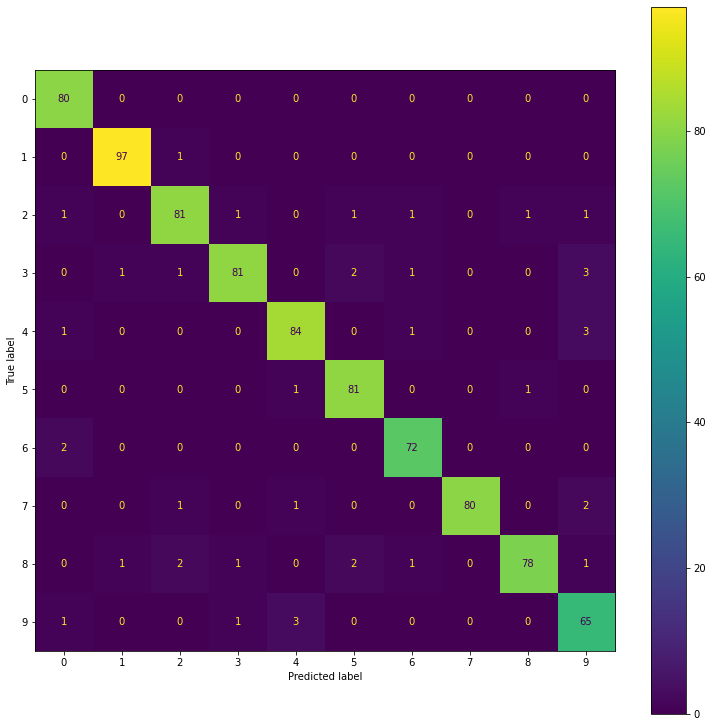

In [18]:
### 4. Plot the confusion matrix of our predicted results.
fig, ax = plt.subplots(figsize=(13,13))
metrics.plot_confusion_matrix(estimator=model, 
                              X=X_test, 
                              y_true=y_test, 
                              ax=ax)

### Looking at the confusion matrix, which two clothing items were mis-classfied with eachother the most?

In [19]:
print('The classifier mistaked 4 and 9 the most.')

The classifier mistaked 4 and 9 the most.


___
### Build a function thats input is an unfitted model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 

In [27]:
### Build a function thats input is an empty model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 
def build_and_eval_model(model, X, y, random_state=23):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = model.score(X_test, y_test)
    report = metrics.classification_report(y_test, y_pred)

    # confusion matrix
    fig, ax = plt.subplots(figsize=(13,13))
    confusion_matrix = metrics.plot_confusion_matrix(
        estimator=model,
        X=X_test, 
        y_true=y_test, 
        ax=ax,
    )

    print('accuracy is: ', accuracy)
    print(report)
    print(confusion_matrix)

## Run LogisticRegression, RandomForest, and Multinomial Naive Bayes through the function you just built and compare the results. 
1. Which classifier did the best, and which classifier did the worst. 

/home/seth/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/seth/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


accuracy is:  0.8785714285714286
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        80
           1       0.95      0.98      0.96        98
           2       0.84      0.84      0.84        87
           3       0.78      0.83      0.80        89
           4       0.94      0.88      0.91        89
           5       0.88      0.83      0.86        83
           6       0.96      0.92      0.94        74
           7       0.93      0.90      0.92        84
           8       0.84      0.84      0.84        86
           9       0.81      0.83      0.82        70

    accuracy                           0.88       840
   macro avg       0.88      0.88      0.88       840
weighted avg       0.88      0.88      0.88       840



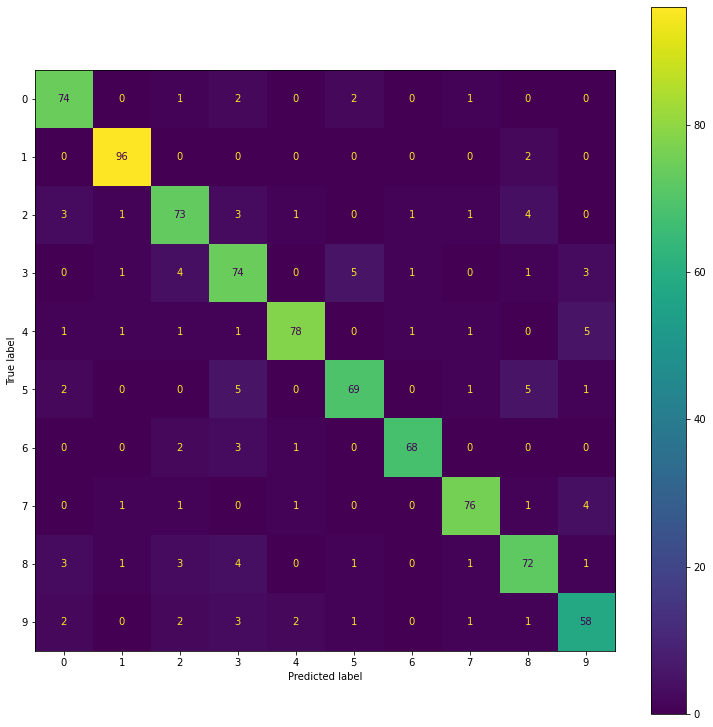

In [28]:
# LogisticRegression
lr = LogisticRegression()
build_and_eval_model(lr, X, y)

/home/seth/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


accuracy is:  0.9333333333333333
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        80
           1       0.97      0.98      0.97        98
           2       0.91      0.94      0.93        87
           3       0.95      0.89      0.92        89
           4       0.96      0.90      0.93        89
           5       0.94      0.93      0.93        83
           6       0.91      0.97      0.94        74
           7       0.94      0.95      0.95        84
           8       0.95      0.91      0.93        86
           9       0.86      0.86      0.86        70

    accuracy                           0.93       840
   macro avg       0.93      0.93      0.93       840
weighted avg       0.93      0.93      0.93       840



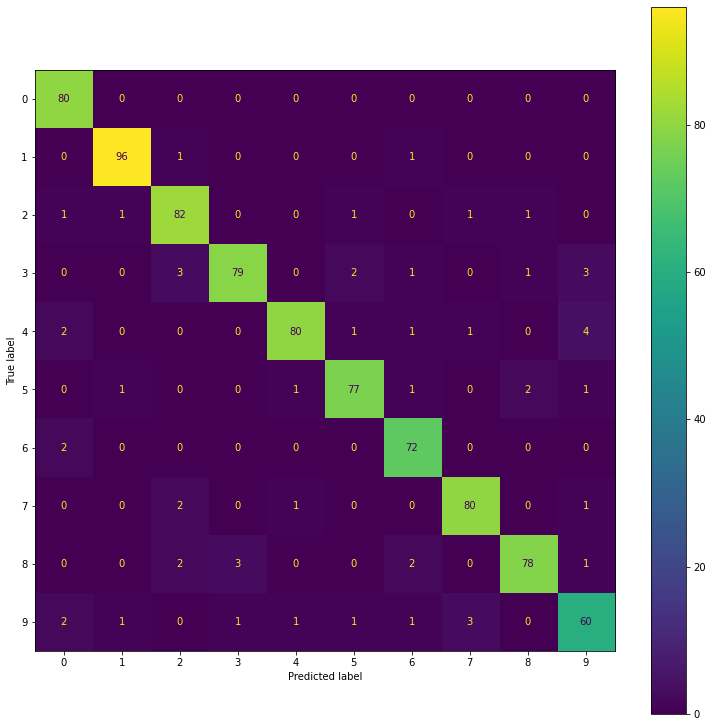

In [29]:
# RandomForest
rf = RandomForestClassifier()
build_and_eval_model(rf, X, y)

/home/seth/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


accuracy is:  0.8226190476190476
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        80
           1       0.93      0.89      0.91        98
           2       0.82      0.76      0.79        87
           3       0.85      0.81      0.83        89
           4       0.86      0.67      0.75        89
           5       0.92      0.73      0.82        83
           6       0.85      0.92      0.88        74
           7       0.95      0.93      0.94        84
           8       0.61      0.80      0.69        86
           9       0.63      0.80      0.70        70

    accuracy                           0.82       840
   macro avg       0.83      0.82      0.82       840
weighted avg       0.84      0.82      0.83       840



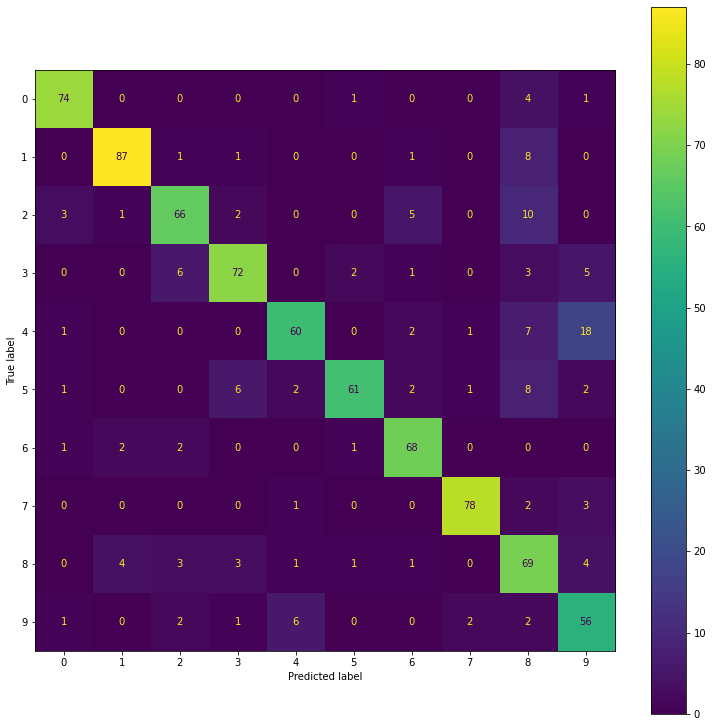

In [31]:
# MultinomialNB
mb = MultinomialNB()
build_and_eval_model(mb, X, y)